In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install numpy


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:/Users/Yash Bhardwaj/Downloads/covid_economy_data.csv")
df

,Country,Year,GDP (Billion USD),Unemployment Rate (%),Inflation Rate (%),Government Stimulus (Billion USD),Healthcare Expenditure (% of GDP),Tourism Revenue (Billion USD),Stock Market Index
0,France,2024,10961.21,9.91,9.10,585.32,4.79,397.88,15949.75
1,Germany,2020,7466.14,11.73,8.36,156.62,7.93,60.10,14830.60
2,Japan,2020,19671.70,3.69,2.91,332.62,17.69,329.84,24918.44
3,UK,2023,24472.51,13.70,4.59,1237.96,6.58,51.46,14715.32
4,Japan,2022,24718.74,12.92,6.84,757.58,11.76,65.70,19556.05
...,...,...,...,...,...,...,...,...,...
595,Canada,2019,20690.20,9.24,9.50,491.38,16.36,246.01,25573.11
596,UK,2019,21143.75,6.55,3.38,1655.54,18.37,398.71,8026.57
597,Germany,2022,9407.11,14.08,7.97,729.25,4.82,205.03,24934.28
598,France,2021,19062.42,3.90,7.59,17.96,3.45,365.05,36789.50


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            600 non-null    object 
 1   Year                               600 non-null    int64  
 2   GDP (Billion USD)                  600 non-null    float64
 3   Unemployment Rate (%)              600 non-null    float64
 4   Inflation Rate (%)                 600 non-null    float64
 5   Government Stimulus (Billion USD)  600 non-null    float64
 6   Healthcare Expenditure (% of GDP)  600 non-null    float64
 7   Tourism Revenue (Billion USD)      600 non-null    float64
 8   Stock Market Index                 600 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 42.3+ KB


In [33]:
df.isnull().sum().sum()

0

In [35]:
df.describe()

,Year,GDP (Billion USD),Unemployment Rate (%),Inflation Rate (%),Government Stimulus (Billion USD),Healthcare Expenditure (% of GDP),Tourism Revenue (Billion USD),Stock Market Index
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2021.546667,12457.821367,8.495067,5.153717,968.304883,11.532183,244.163350,20580.696817
std,1.720297,7439.278110,3.812433,2.827581,577.075225,4.912367,143.163189,11220.497791
min,2019.000000,505.910000,2.050000,0.000000,13.370000,3.020000,5.050000,1065.730000
25%,2020.000000,5688.845000,5.335000,2.742500,457.592500,7.377500,115.382500,10986.715000
50%,2022.000000,12140.205000,8.340000,5.310000,931.175000,11.365000,244.215000,20279.460000
75%,2023.000000,19491.742500,11.810000,7.610000,1468.292500,15.982500,370.325000,30136.315000
max,2024.000000,24968.630000,14.990000,9.990000,1991.690000,19.940000,498.980000,39845.940000


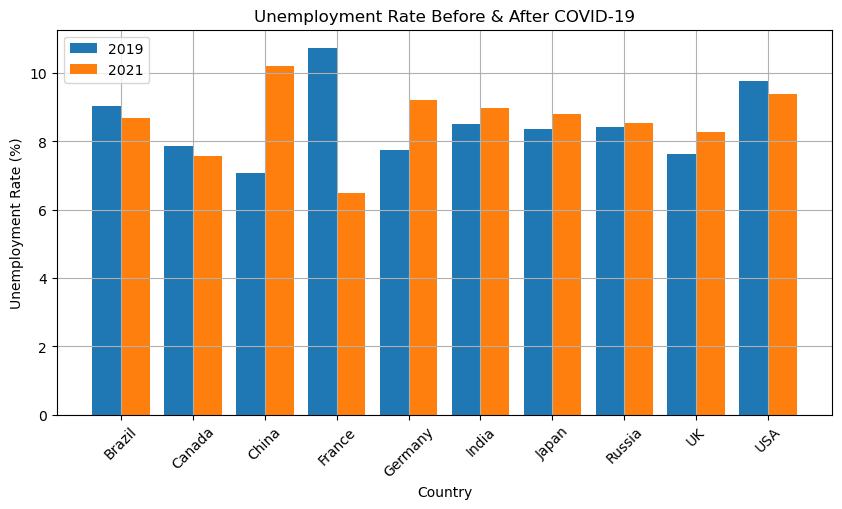

In [57]:
#What was the impact of COVID-19 on unemployment rates?

plt.figure(figsize=(10, 5))

# Filter data for 2019 (Pre-COVID) and 2021 (Peak COVID impact)
unemployment_2019 = df[df["Year"] == 2019].groupby("Country")["Unemployment Rate (%)"].mean()
unemployment_2021 = df[df["Year"] == 2021].groupby("Country")["Unemployment Rate (%)"].mean()

# Plot bar chart
x_labels = unemployment_2019.index # Extracts country names (or categories) as x-axis labels
x = np.arange(len(x_labels)) ## Creates an array of indices for bar positions

plt.bar(x - 0.2, unemployment_2019, width=0.4, label="2019") #x - 0.2: Shifts the bars slightly to the left (so they don’t overlap with 2021 bars).
plt.bar(x + 0.2, unemployment_2021, width=0.4, label="2021")

plt.xticks(ticks=x, labels=x_labels, rotation=45)
plt.xlabel("Country")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Before & After COVID-19")
plt.legend()
plt.grid(True)
plt.show()


In [107]:
# How Did COVID-19 Impact GDP Growth Across Different Countries (2019-2021)?

# Sample GDP Growth Data (in %)
data = {
    "Country": ["USA", "India", "UK", "Germany", "China", "Brazil", "Japan"],
    "GDP_2019": [2.3, 4.2, 1.5, 0.6, 6.1, 1.1, 0.3],
    "GDP_2020": [-3.4, -7.3, -9.7, -4.9, 2.3, -4.1, -4.8],
    "GDP_2021": [5.7, 8.9, 7.5, 2.9, 8.1, 4.6, 1.7]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df.set_index("Country", inplace=True)

# Display dataset
print(df)


         GDP_2019  GDP_2020  GDP_2021
Country                              
USA           2.3      -3.4       5.7
India         4.2      -7.3       8.9
UK            1.5      -9.7       7.5
Germany       0.6      -4.9       2.9
China         6.1       2.3       8.1
Brazil        1.1      -4.1       4.6
Japan         0.3      -4.8       1.7


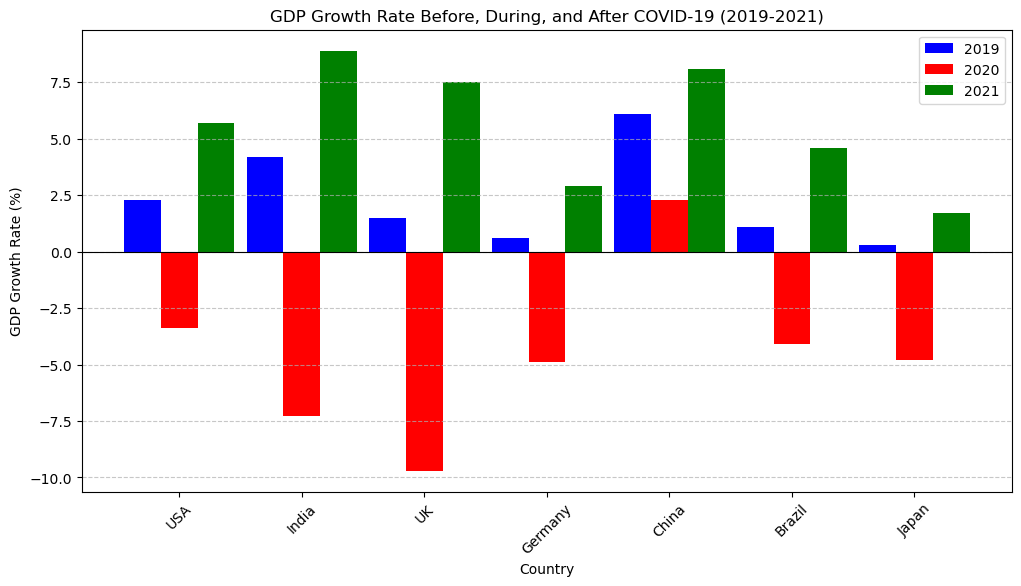

In [97]:
# what is the GDP growth rate before,during,and after COVID-19(2019-2024)
# Define x-axis labels (Countries)
x_labels = df.index  
x = np.arange(len(x_labels))  # Numeric positions for bars

# Set bar width
bar_width = 0.3  

# Create grouped bar chart
plt.figure(figsize=(12, 6))

# Plot bars for each year
plt.bar(x - bar_width, df["GDP_2019"], width=bar_width, label="2019", color="blue")
plt.bar(x, df["GDP_2020"], width=bar_width, label="2020", color="red")
plt.bar(x + bar_width, df["GDP_2021"], width=bar_width, label="2021", color="green")

# Customize the plot
plt.xticks(ticks=x, labels=x_labels, rotation=45)  # Set x-axis labels
plt.xlabel("Country")
plt.ylabel("GDP Growth Rate (%)")
plt.title("GDP Growth Rate Before, During, and After COVID-19 (2019-2021)")
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at 0%
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Show the plot
plt.show()


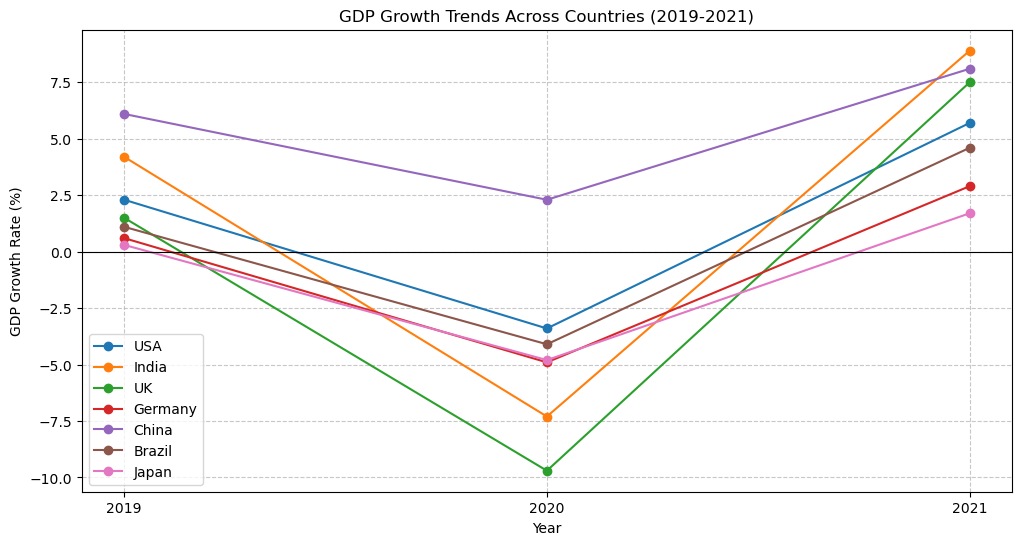

In [113]:
# GDP growth trends across countries (2019-2021)
# Line plot for GDP trends
plt.figure(figsize=(12, 6))

for country in df.index:
    plt.plot(["2019", "2020", "2021"], df.loc[country], marker="o", label=country) #This adds circular markers (dots) at each data point on the line.

plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.title("GDP Growth Trends Across Countries (2019-2021)")
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at 0%
plt.legend()
plt.grid(linestyle="--", alpha=0.7)

plt.show()


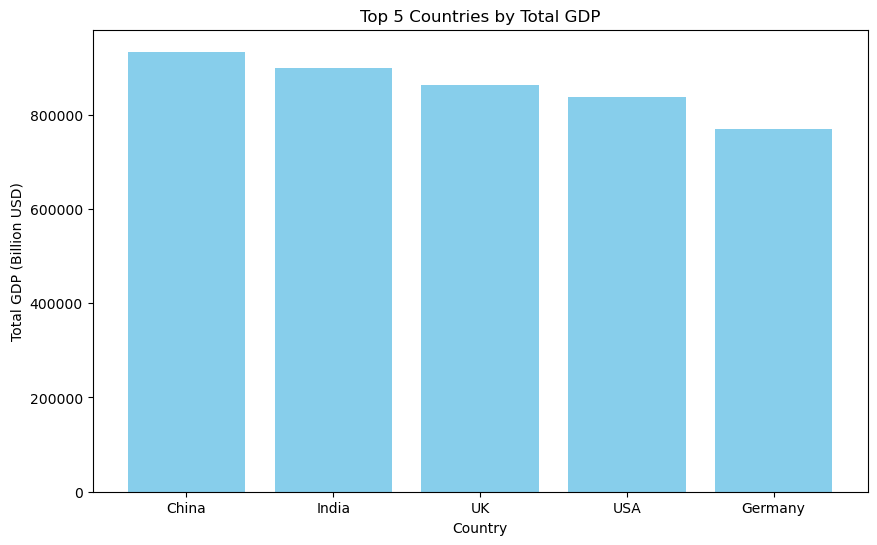

In [166]:
#top 5 countries by total GDP
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Yash Bhardwaj/Downloads/covid_economy_data.csv"
data = pd.read_csv(file_path)

# Aggregate the data by country and get the total GDP
country_gdp = data.groupby('Country')['GDP (Billion USD)'].sum().reset_index()

# Sort the countries by the total GDP in descending order
top_5_countries = country_gdp.sort_values(by='GDP (Billion USD)', ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['Country'], top_5_countries['GDP (Billion USD)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total GDP (Billion USD)')
plt.title('Top 5 Countries by Total GDP')
plt.show()




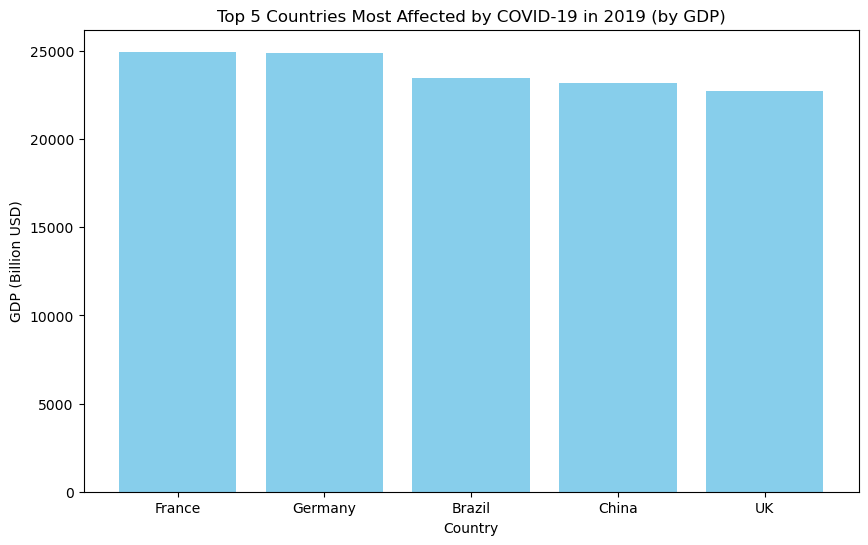

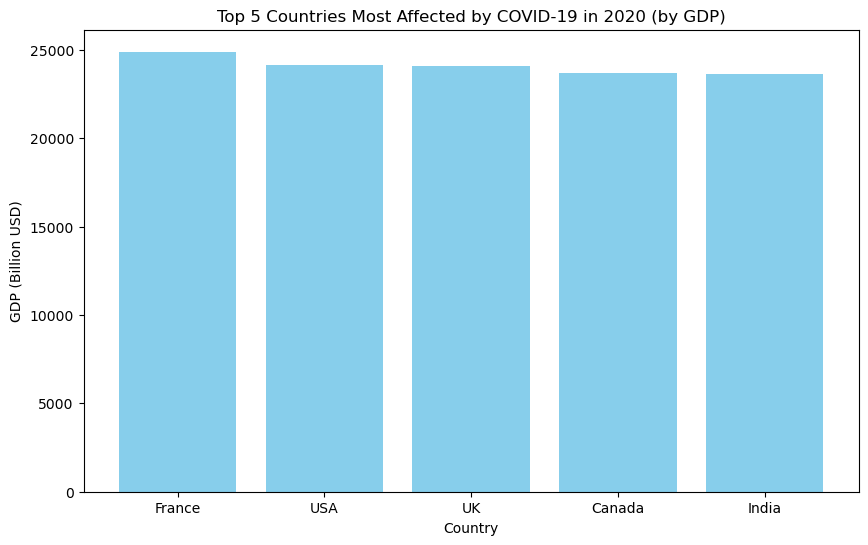

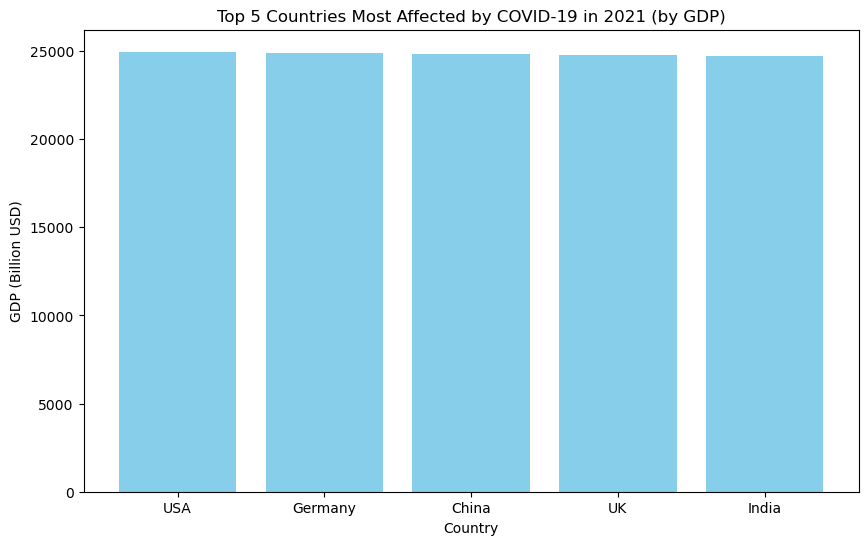

In [170]:
#which 5 country most effected by covid-19(by GDP) in 2019,2020,2021?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Yash Bhardwaj/Downloads/covid_economy_data.csv"
data = pd.read_csv(file_path)

# Filter the data for the years 2019, 2020, and 2021
data_filtered = data[data['Year'].isin([2019, 2020, 2021])]

# Identify the most affected countries for each year based on GDP (Billion USD)
for year in [2019, 2020, 2021]:
    year_data = data_filtered[data_filtered['Year'] == year]
    top_countries = year_data.sort_values(by='GDP (Billion USD)', ascending=False).head(5)
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(top_countries['Country'], top_countries['GDP (Billion USD)'], color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('GDP (Billion USD)')
    plt.title(f'Top 5 Countries Most Affected by COVID-19 in {year} (by GDP)')
    plt.show()


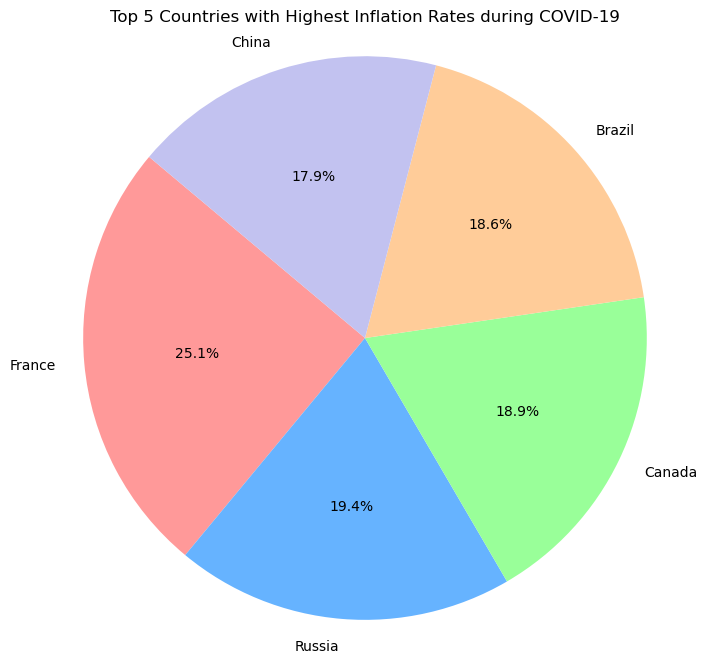

In [172]:
#which 5 country inflation rate is high in covid-19?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Yash Bhardwaj/Downloads/covid_economy_data.csv"
data = pd.read_csv(file_path)

# Filter the data for the years 2020 and 2021 (COVID-19 pandemic years)
data_filtered = data[data['Year'].isin([2020, 2021])]

# Calculate the average inflation rate for each country during the pandemic
country_inflation = data_filtered.groupby('Country')['Inflation Rate (%)'].mean().reset_index()

# Sort the countries by the average inflation rate in descending order
top_5_countries = country_inflation.sort_values(by='Inflation Rate (%)', ascending=False).head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_countries['Inflation Rate (%)'], labels=top_5_countries['Country'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Top 5 Countries with Highest Inflation Rates during COVID-19')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


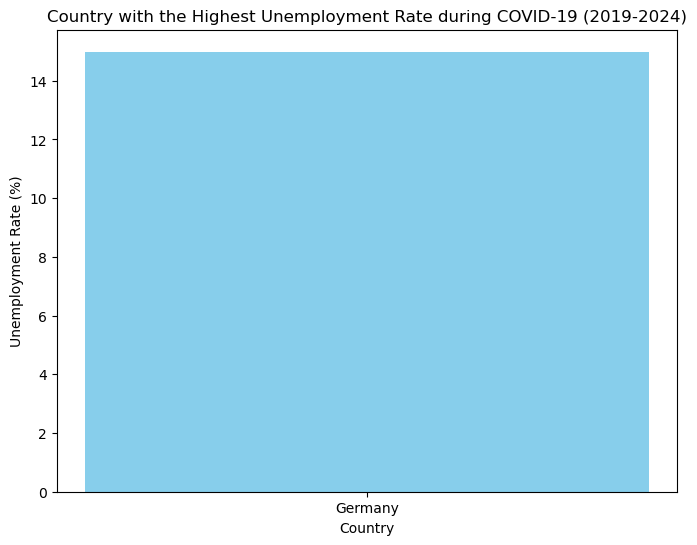

In [174]:
#which country have max unemployment rate during covid-19?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Yash Bhardwaj/Downloads/covid_economy_data.csv"
data = pd.read_csv(file_path)

# Filter the data for the years 2019-2024
data_filtered = data[data['Year'].between(2019, 2024)]

# Find the country with the maximum unemployment rate
max_unemployment_country = data_filtered.loc[data_filtered['Unemployment Rate (%)'].idxmax()]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(max_unemployment_country['Country'], max_unemployment_country['Unemployment Rate (%)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.title('Country with the Highest Unemployment Rate during COVID-19 (2019-2024)')
plt.show()



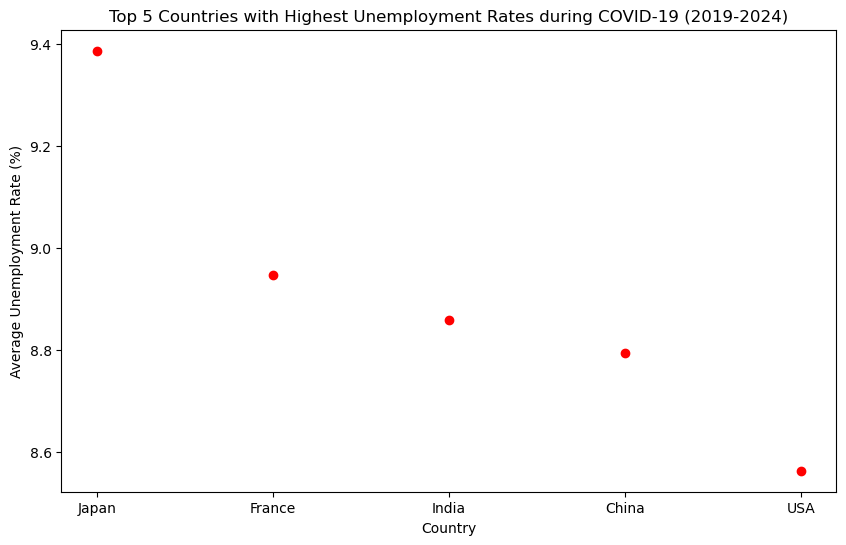

In [180]:
#which 5 country have max unemployment rate during covid-19 in 2019-2024 year with bar chart
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Yash Bhardwaj/Downloads/covid_economy_data.csv"
data = pd.read_csv(file_path)

# Filter the data for the years 2019-2024
data_filtered = data[data['Year'].between(2019, 2024)]

# Calculate the average unemployment rate for each country during the pandemic
country_unemployment = data_filtered.groupby('Country')['Unemployment Rate (%)'].mean().reset_index()

# Sort the countries by the average unemployment rate in descending order
top_5_countries = country_unemployment.sort_values(by='Unemployment Rate (%)', ascending=False).head(5)


# Plot the scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(top_5_countries['Country'], top_5_countries['Unemployment Rate (%)'], color='red')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Top 5 Countries with Highest Unemployment Rates during COVID-19 (2019-2024)')
plt.show()
